In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def normalize(img):
    nImg = np.zeros(img.shape)
    max_ = img.max()
    min_ = img.min()
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            nImg[i][j]=(img[i][j]-min_)/(max_-min_)*255

    print(img.min(), img.max())
    print(nImg.min(), nImg.max())

    nImg = np.array(nImg, dtype="uint8")
    return nImg
    

In [3]:
path = "../img/cameraman.jpg"
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
inp = img




In [4]:
# print(img)
# print("========================>")
# print(np.log1p(img))

In [5]:
img = np.log1p(img)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
print(f)
print(fshift)

[[1058656.48242188-4.54747351e-13j   35946.1294857 +7.60594384e+04j
    28074.48886961-1.85048071e+04j ...    3573.47616334+1.39565941e+04j
    28074.48886961+1.85048071e+04j   35946.1294857 -7.60594384e+04j]
 [  47099.17909175-3.09181415e+04j  -35965.10867667-4.52791723e+04j
   -17615.41439852+3.32398397e+04j ...   -7682.99489767-7.88927112e+03j
     4668.81625578+1.51572678e+04j   -9027.71358702+1.41031196e+04j]
 [   7836.97478597-1.95059485e+04j  -10336.92504776+7.72448559e+03j
     1718.73950472+6.26581008e+03j ...   -3972.66505224+6.44213060e+03j
    -4654.16082532+4.37537741e+03j   11124.60154418+7.34790095e+03j]
 ...
 [  -4904.83197087-2.02678319e+03j   -8587.81563017-4.54377119e+02j
     1725.79430906+4.82634394e+03j ...   -6865.78316665+7.67777256e+03j
     9113.35475376-2.18469751e+03j   -2558.55667111-1.05536048e+03j]
 [   7836.97478597+1.95059485e+04j   11124.60154418-7.34790095e+03j
    -4654.16082532-4.37537741e+03j ...    9266.37044069+2.98887995e+03j
     1718.73950472-

-1.7746855323079607 13.872511192756201
0.0 255.0


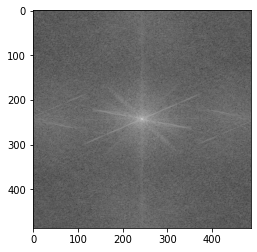

In [6]:
# scaler = 255/np.max(np.log(np.abs(fshift)))
magnitude = normalize(np.log(np.abs(fshift)))
plt.imshow(magnitude, "gray")

In [7]:
height, width = img.shape
sigma = 50
gauss = np.zeros((height, width))
for i in range(height):
    for j in range(width):
        gauss[i][j]=(np.exp(-((i-height//2)**2+(j-width//2)**2)/(2*sigma*sigma))/(2*np.pi*sigma*sigma))


5.5225296372515585e-11 1.0
0.0 255.0


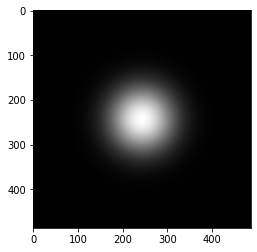

In [8]:
gauss = gauss/np.max(gauss)
gauss_image = normalize(gauss)
plt.imshow(gauss_image, "gray")

In [16]:
mag = np.abs(fshift)
angle = np.angle(fshift)
new_mag = mag*gauss
print(np.exp(1j*angle))
print(np.multiply(new_mag, np.exp(1j*angle)))
combined = np.multiply(new_mag, np.exp(1j*angle))
imgCombined = np.real(np.fft.ifft2(np.fft.ifftshift(combined)))
imgCombined = np.exp(imgCombined)-1
cv2.imshow("output", normalize(imgCombined))
cv2.imshow("input Image",inp)
cv2.waitKey(0)
cv2.destroyAllWindows()

[[-0.97339999-0.22911232j  0.15283625+0.98825153j  0.4375515 -0.89919335j
  ...  0.1669281 -0.98596907j -0.6887558 +0.72499341j
   0.55567595-0.83139897j]
 [ 0.94026808+0.34043493j -0.19497642-0.98080793j -0.61477863+0.78869971j
  ... -0.37644995+0.92643696j  0.70759716-0.70661606j
  -0.78681527+0.61718856j]
 [ 0.28042732-0.95987526j -0.87771303+0.47918665j  0.98601636+0.16664855j
  ... -0.45115186-0.89244719j  0.4343267 +0.90075541j
   0.48672737-0.87355393j]
 ...
 [ 0.48672737+0.87355393j  0.4343267 -0.90075541j -0.45115186+0.89244719j
  ...  0.98601636-0.16664855j -0.87771303-0.47918665j
   0.28042732+0.95987526j]
 [-0.78681527-0.61718856j  0.70759716+0.70661606j -0.37644995-0.92643696j
  ... -0.61477863-0.78869971j -0.19497642+0.98080793j
   0.94026808-0.34043493j]
 [ 0.55567595+0.83139897j -0.6887558 -0.72499341j  0.1669281 +0.98596907j
  ...  0.4375515 +0.89919335j  0.15283625-0.98825153j
  -0.97339999+0.22911232j]]
[[-2.50801512e-09-5.90319683e-10j  7.30085155e-10+4.72078959e-09

-6.539844208729221 17.13351080574591
0.0 255.0


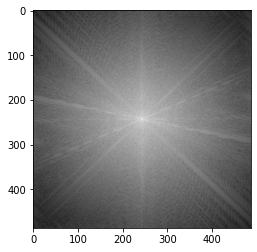

In [10]:
x = np.fft.fft2(imgCombined)
xshift = np.fft.fftshift(x)
magnitude = normalize(np.log(np.abs(xshift)))
plt.imshow(magnitude, "gray")